In [2]:
import numpy as np
import scipy.optimize as sp
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt
import pandas as pd
from astropy.time import Time
import astropy.units as u

# Cleaning the Data Set

In [3]:
df = pd.read_csv('Master_Data.csv')
df

,Cadence (Burst),JD_UTC,av_rel_flux T1,av_rel_flux C2,av_rel_flux C3,av_rel_flux C4,av_rel_flux C5,std_T1,std_C2,std_C3,std_C4,std_C5,CoV T1,CoV C2,CoV C3,CoV C4,CoV C5
0,9-1,2458634.522,0.456628,0.233339,0.339823,0.326439,0.451546,0.002471,0.000887,0.002142,0.002114,0.002726,0.54115,0.37997,0.63035,0.64751,0.60380
1,1-2,2458577.078,0.450170,0.228931,0.339605,0.335194,0.447539,0.002006,0.001622,0.002960,0.003196,0.003580,0.44550,0.70851,0.87161,0.95335,0.80001
2,1-3,2458578.134,0.450683,0.228680,0.340786,0.331198,0.451231,0.003543,0.001859,0.002193,0.002973,0.004438,0.78622,0.81300,0.64345,0.89761,0.98360
3,1-4,2458579.073,0.443331,0.227401,0.341038,0.337236,0.445611,0.002052,0.001855,0.004357,0.002738,0.004142,0.46282,0.81586,1.27755,0.81188,0.92961
4,1-5,2458580.129,0.455698,0.230386,0.337893,0.331528,0.451841,0.001656,0.001190,0.001391,0.002025,0.002493,0.36350,0.51657,0.41154,0.61085,0.55166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,25-2,2458772.319,0.448605,0.228226,0.346733,0.314918,0.464618,0.002445,0.000960,0.001108,0.002206,0.002236,0.54492,0.42065,0.31969,0.70064,0.48121
77,25-5,2458775.310,0.464657,0.229137,0.344663,0.318101,0.461843,0.001035,0.001213,0.001444,0.001581,0.002703,0.22272,0.52943,0.41903,0.49709,0.58524
78,25-6,2458776.310,0.468700,0.231277,0.346630,0.313944,0.461648,0.001667,0.000976,0.001777,0.003936,0.003895,0.35564,0.42185,0.51270,1.25377,0.84377
79,26-3,2458781.313,0.470187,0.229390,0.346115,0.312454,0.467016,0.005155,0.004178,0.005852,0.011035,0.011951,1.09639,1.82156,1.69085,3.53160,2.55910


Text(0, 0.5, 'Flux')

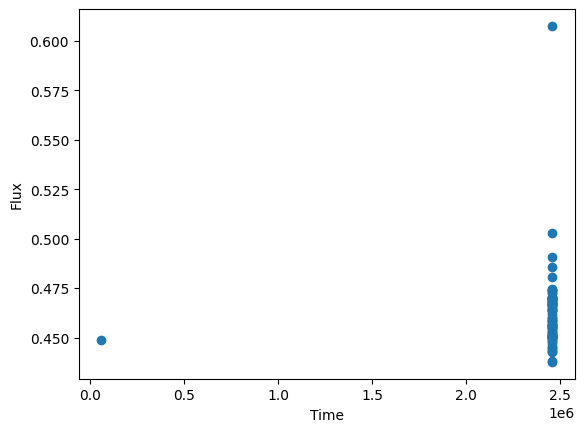

In [4]:
time = df['JD_UTC']
flux = df['av_rel_flux T1']
error = df['std_T1']
comp = df["av_rel_flux C2"]

plt.scatter(time, flux)
#plt.xlim(2.45e6,2.46e6)
plt.xlabel('Time')
plt.ylabel('Flux')

Text(0, 0.5, 'Normalized Flux')

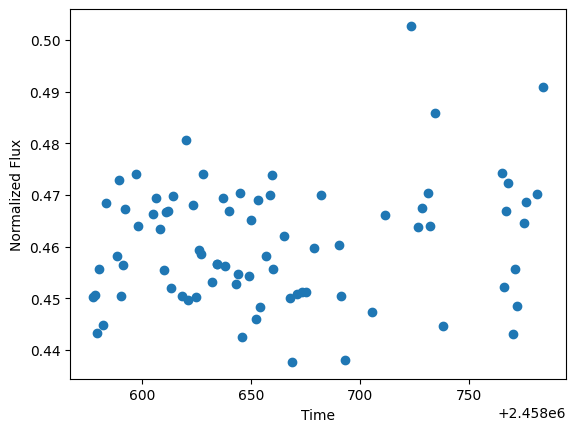

In [5]:
# CLEANED DATA SET

dropped = df.drop([30,63]) # use this one
dropped.where(df['JD_UTC'] < 2.4e6).dropna()

t_astro = dropped['JD_UTC'] # time
mags = dropped['av_rel_flux T1']  # signal
d_error = dropped['std_T1']
d_comp = dropped["av_rel_flux C2"]

plt.scatter(t_astro, mags)
plt.xlabel('Time')
plt.ylabel('Normalized Flux')

# Phase Folding

In [6]:
phase_folded_time = d_time % 5.598
# https://astronomy.stackexchange.com/questions/49579/how-do-i-phase-fold-the-light-curve-for-a-variable-star
# phase folded time is just t % P


plt.scatter(phase_folded_time, d_flux)

NameError: name 'd_time' is not defined

# Lomb-Scargle Periodogram w/ All Data

In [7]:
ls, power = LombScargle(t_astro, mags, d_error, nterms = 2).autopower()

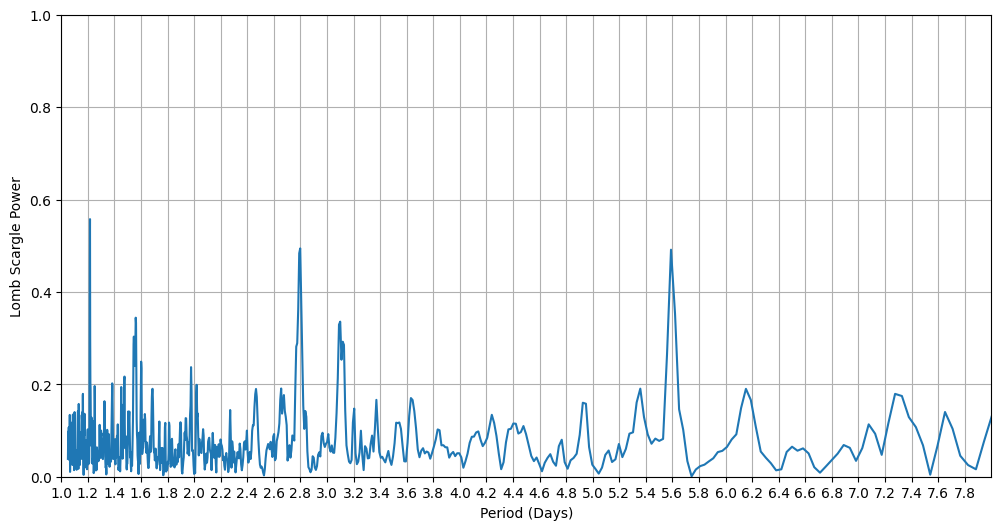

In [8]:
plt.figure(figsize = (12, 6))

t_end = 8

plt.xlim(1, t_end)
plt.ylim(0, 1)
plt.plot(1/ls, power)
plt.xticks(np.arange(1, t_end, 0.2))

plt.xlabel("Period (Days)")
plt.ylabel("Lomb Scargle Power")
plt.grid()

# LS w/ Data Split in Quarters

In [9]:
q1 = dropped.iloc[np.arange(0,20), :]
q1

,Cadence (Burst),JD_UTC,av_rel_flux T1,av_rel_flux C2,av_rel_flux C3,av_rel_flux C4,av_rel_flux C5,std_T1,std_C2,std_C3,std_C4,std_C5,CoV T1,CoV C2,CoV C3,CoV C4,CoV C5
0,9-1,2458634.522,0.456628,0.233339,0.339823,0.326439,0.451546,0.002471,0.000887,0.002142,0.002114,0.002726,0.54115,0.37997,0.63035,0.64751,0.60380
1,1-2,2458577.078,0.450170,0.228931,0.339605,0.335194,0.447539,0.002006,0.001622,0.002960,0.003196,0.003580,0.44550,0.70851,0.87161,0.95335,0.80001
2,1-3,2458578.134,0.450683,0.228680,0.340786,0.331198,0.451231,0.003543,0.001859,0.002193,0.002973,0.004438,0.78622,0.81300,0.64345,0.89761,0.98360
3,1-4,2458579.073,0.443331,0.227401,0.341038,0.337236,0.445611,0.002052,0.001855,0.004357,0.002738,0.004142,0.46282,0.81586,1.27755,0.81188,0.92961
4,1-5,2458580.129,0.455698,0.230386,0.337893,0.331528,0.451841,0.001656,0.001190,0.001391,0.002025,0.002493,0.36350,0.51657,0.41154,0.61085,0.55166
5,1-6,2458582.084,0.444742,0.229150,0.343507,0.331258,0.447313,0.001668,0.000677,0.001481,0.002146,0.002117,0.37506,0.29556,0.43118,0.64789,0.47336
6,1-7,2458583.062,0.468402,0.227647,0.339019,0.336703,0.448226,0.002702,0.000909,0.002671,0.001980,0.003198,0.57689,0.39940,0.78780,0.58796,0.71349
7,2-1,2458588.105,0.458164,0.228148,0.337959,0.331605,0.454798,0.001376,0.001231,0.002036,0.001133,0.001965,0.30025,0.53958,0.60235,0.34167,0.43208
8,2-2,2458589.132,0.472849,0.230992,0.338817,0.326235,0.456242,0.002126,0.000892,0.001412,0.002660,0.001972,0.44967,0.38623,0.41668,0.81548,0.43225
9,2-3,2458590.116,0.450350,0.230814,0.339740,0.329479,0.451512,0.003151,0.000832,0.001215,0.002205,0.002620,0.69968,0.36064,0.35766,0.66933,0.58033


Text(0, 0.5, 'Normalized Flux')

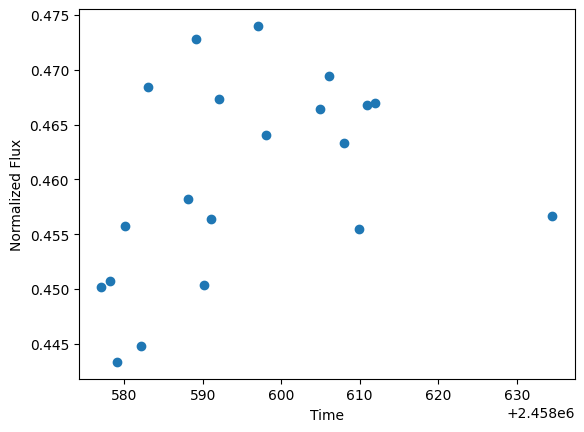

In [10]:
q1_time = q1['JD_UTC'] # time
q1_flux = q1['av_rel_flux T1']  # signal
q1_error = q1['std_T1']

plt.scatter(q1_time, q1_flux)
plt.xlabel('Time')
plt.ylabel('Normalized Flux')

In [11]:
q1_ls, q1_power = LombScargle(q1_time, q1_flux, q1_error, nterms = 2).autopower()

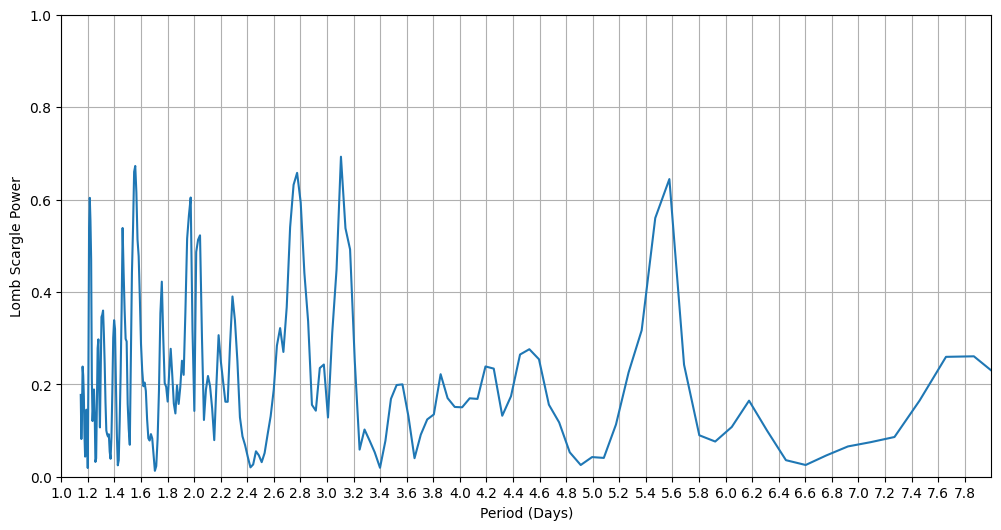

In [12]:
plt.figure(figsize = (12, 6))

t_end = 8

plt.xlim(1, t_end)
plt.ylim(0, 1)
plt.plot(1/q1_ls, q1_power)
plt.xticks(np.arange(1, t_end, 0.2))

plt.xlabel("Period (Days)")
plt.ylabel("Lomb Scargle Power")
plt.grid()

In [17]:
q1_dict = {"Q1_Period": 1/q1_ls, "Q1_Power": q1_power}

q1_df = pd.DataFrame(q1_dict)
q1_df.where(q1_df["Q1_Period"] <= 8).dropna().sort_values(by = "Q1_Power", ascending = False).head(10)

# restrict this so period is between 1-8

,Q1_Period,Q1_Power
92,3.105081,0.692663
184,1.556748,0.672618
185,1.548356,0.659909
103,2.775072,0.657731
51,5.577087,0.644274
104,2.748517,0.631870
183,1.565232,0.615437
145,1.974021,0.604318
236,1.214461,0.603629
102,2.802146,0.593486
